<h2>Лабораторная работа 2</h2>

<h3>Задание 1. Имитация непрерывных случайных величин (метод обратных функций)</h3>

Обратная функция — это функция, которая обращает действие исходной функции. Если функция $f(x)$ отображает элемент $x$ в элемент $y$, то её обратная функция $f^{−1}(y)$ будет отображать элемент $y$ обратно в элемент $x$

In [1]:
from sympy import Symbol, integrate, solve, symbols, exp, Eq
from pynverse import inversefunc
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np
import random
import math
from sympy import *
from sympy.abc import x, y
from sympy.calculus.util import continuous_domain

Линейный конгруэнтный генератор.
Основан на рекуррентной формуле $X_{n+1} = (a \cdot X_n + c)\mod m$

In [2]:
# Генератор псевдослучайных чисел
class LCG:
    def __init__(self, seed, a=1664525, c=1013904223, m=2**32):
        self.seed = seed  # Начальное значение
        self.a = a        # Множитель
        self.c = c        # Приращение
        self.m = m        # Модуль
        self.current = seed 

    def random(self):
        """Генерация следующего псевдослучайного числа в диапазоне от 0 до 1."""
        self.current = (self.a * self.current + self.c) % self.m
        return self.current / self.m

<b>Непрерывная случайная величина</b> — это тип случайной величины, которая может принимать любое значение из определённого интервала числовой оси.
Для них вероятность не выражается в виде конкретных значений, а задаётся через функцию плотности вероятности

<b>Метод обратной функции</b> используется для моделирования случайных величин с заданной плотностью вероятности. Если есть некоторая плотность распределения $f(x)$, и вы знаете её интеграл (функцию распределения), то метод обратной функции использует её обратную, чтобы найти значение случайной величины $x$ по сгенерированному случайному числу

<b>Плотность вероятности (PDF)</b> — это функция, которая описывает вероятность случайной величины принимать определённые значения. Для непрерывных случайных величин, PDF интегрируется в заданных пределах, чтобы получить вероятность.

In [3]:
inverse_function = ""
lcg = LCG(seed=33)
number_of_tests = 10000

def find_inverse_function(input_text): 
    global inverse_function 
    ex = sympify(input_text) 
    distribution_expression = ex 
    extra = ex - y  # Создаем уравнение, вычитая y из выражения (находим F(x) - y = 0)
    results = solve(extra, x)  # Решаем уравнение для x (находим обратную функцию)
    
    is_found = False
    for result in results:
        # Проверяем, является ли найденная функция непрерывной на интервале (0, 1)
        is_continuous = continuous_domain(result, y, S.Reals).is_proper_superset(Interval(0, 1))
        
        derivative = diff(result, y)  # Вычисляем производную найденной функции по y
        # Проверяем, является ли производная положительной (функция монотонно возрастающая)
        derivative_positive = solve(derivative > 0, y, domain=S.Reals)
        
        # Если функция непрерывна и её производная положительна, мы можем считать её обратной
        if derivative_positive and is_continuous:
            print("Результат метода обратной функции:", result)
            inverse_function = lambdify(y, result)
            is_found = True
            break  

    if not is_found:
        print("Обратная функция не найдена")

def generate_func_data(amount):
    global inverse_function
    data=[]
    for i in range(amount):
        y = lcg.random()
        data.append(inverse_function(y)) # Вычисляем значение обратной функции для случайного числа и добавляем в список
    return data
        
func = "x**2-1"
find_inverse_function(func)

func_data = generate_func_data(number_of_tests)
limits = (inverse_function(0), inverse_function(1))
print("Диапазон значений НСВ:", f"от {limits[0]:.4f} до {limits[1]:.4f}")

Результат метода обратной функции: sqrt(y + 1)
Диапазон значений НСВ: от 1.0000 до 1.4142


<b>Функция распределения</b> - описывает вероятность того, что случайная величина примет значение меньше или равное $x$ (интеграл от плотности вероятности)

<b>Кумулятивное распределение</b> — это функция, которая описывает вероятность того, что случайная величина примет значение, меньшее или равное определенному значению. Находя кумулятивное значение, мы используем функцию распределения (CDF) для преобразования равномерно распределённых случайных чисел в нормально распределённые случайные величины.

In [4]:
# Генерация случайных чисел с помощью метода обратной функции
sample_size = 10000  # Количество точек
random_points = np.array([lcg.random() for _ in range(sample_size)])  # Массив случайных чисел

# Инвертируем функцию нормального распределения (генерация нормальных случайных величин)
inv_norm_cdf = inversefunc(norm.cdf) # inv_norm_cdf — это инверсия функции кумулятивного распределения (CDF) для нормального распределения. 
                                     # Для получения нормальных случайных величин из равномерно распределенных случайных чисел.
generated_points = np.array([inv_norm_cdf(i) for i in random_points])

<b>Гистограмма</b> — это графический способ представления распределения числовых данных. Она отображает частоту появления данных в различных интервалах значений. Гистограмма позволяет легко увидеть форму распределения данных.

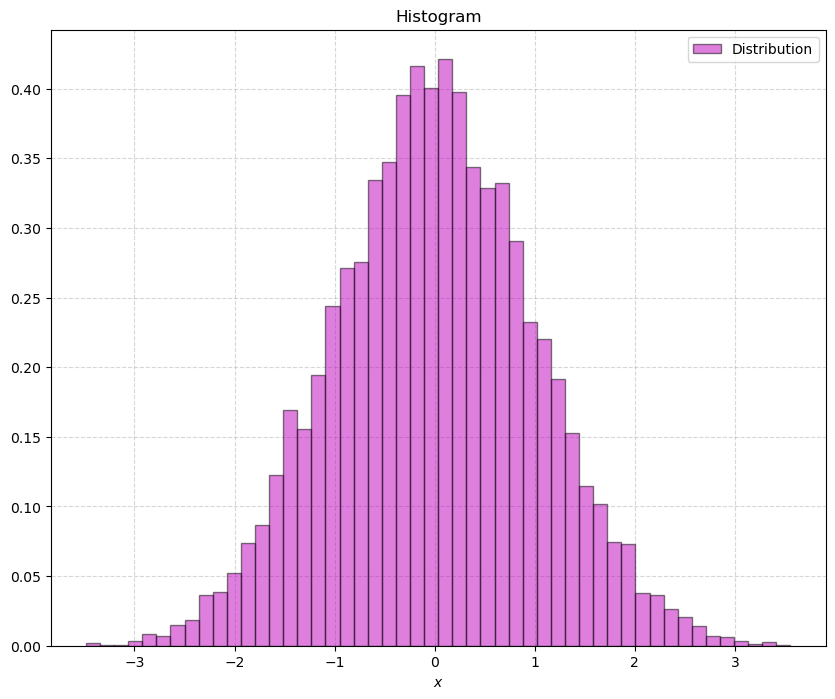

In [5]:
# Функция для создания гистограммы из набора точек.
def create_histogram(data_points): # data_points: массив случайных точек
    if len(data_points) == 0:
        generate_array_of_points()

    data_points = np.array(data_points, dtype=float)  # Преобразуем к массиву чисел
    
    # Создаём гистограмму
    plt.figure(figsize=(10, 8))
    plt.hist(data_points, bins=50, color='m', density=True, edgecolor='k', label='Distribution', alpha=0.5, zorder=2) 
    plt.xlabel(r'$x$') # для каждого интервала по оси y отображается плотность вероятности
    plt.legend()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.title("Histogram")
    plt.show()

# Создаём гистограмму для полученных случайных величин
create_histogram(generated_points)

<b>Точечная оценка</b> — это одно конкретное число, которое мы используем как приближение истинного значения параметра на основе выборки. Однако точечная оценка не даёт информации о том, насколько она может быть точной, и не учитывает неопределённости выборки.
<br><b>Интервальная оценка</b> — это диапазон значений, который с определенной степенью уверенности включает истинное значение параметра.

In [6]:
# Рассчитываем основные статистические параметры
sample_size = len(generated_points)
mean_value = generated_points.mean()  # Точечная оценка математического ожидания
variance_value = ((generated_points - mean_value) ** 2).sum() / (sample_size - 1)  # Точечная оценка дисперсии

# Интервальные оценки для матожидания
confidence_level = 0.95  # Уровень доверия
gamma = (1 + confidence_level) / 2  # Параметр для t-распределения
t_gamma = stats.t.ppf(gamma, sample_size - 1) # Для вычисления доверительного интервала используется t-распределение 
                                              # (поскольку выборка конечная и дисперсия неизвестна)

# Интервальные оценки для среднего значения
lower_bound_mean = mean_value - variance_value / np.sqrt(sample_size) * t_gamma
upper_bound_mean = mean_value + variance_value / np.sqrt(sample_size) * t_gamma

# Интервальные оценки для дисперсии
chi_square_stat = (sample_size - 1) * variance_value ** 2
c1 = stats.chi2.ppf((1 - confidence_level) / 2, sample_size - 1)
c2 = stats.chi2.ppf((1 + confidence_level) / 2, sample_size - 1)

lower_bound_variance = chi_square_stat / c2
upper_bound_variance = chi_square_stat / c1

In [7]:
# Вывод точечных и интервальных оценок
print("Точечная оценка математического ожидания: ", f"{mean_value:.4f}")
print("Точечная оценка дисперсии: ", f"{variance_value:.4f}")
print(f"{confidence_level*100}% интервальная оценка матожидания: [{lower_bound_mean:.4f}, {upper_bound_mean:.4f}]")
print(f"{confidence_level*100}% интервальная оценка дисперсии: [{lower_bound_variance:.4f}, {upper_bound_variance:.4f}]")

Точечная оценка математического ожидания:  -0.0045
Точечная оценка дисперсии:  0.9948
95.0% интервальная оценка матожидания: [-0.0240, 0.0150]
95.0% интервальная оценка дисперсии: [0.9628, 1.0177]


<b>Статистика Колмогорова-Смирнова</b> используется для проверки гипотезы о том, что набор данных следует заданному теоретическому распределению (например, нормальному распределению). Этот тест сравнивает два распределения:
<br><i>Эмпирическая функция распределения (ECDF)</i>, которая основана на данных, полученных в результате эксперимента или выборки.
<br><i>Теоретическая функция распределения (CDF)</i>, которая является предполагаемой функцией распределения.

Колмогорова-Смирнова статистика измеряет максимальное отклонение между этими двумя функциями — эмпирической и теоретической.

In [8]:
# Проверка гипотезы о нормальности распределения (статистика Колмогорова-Смирнова)
ecdf = stats.ecdf(generated_points)  # Эмпирическая функция распределения (ECDF)

# Вычисление статистики Колмогорова-Смирнова
# максимальное отклонение между эмпирической функцией распределения и теоретической функцией
kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - norm.cdf(x)) for x in np.linspace(0, 1, sample_size)) * np.sqrt(sample_size)
print(f"Статистика Колмогорова-Смирнова: {kolmogorov_stat:.4f}")

# Вычисление p-значения (показывает вероятность того, что данные действительно следуют предполагаемому распределению)
p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)
print("p-значение: ", p_value)

Статистика Колмогорова-Смирнова: 0.8221
p-значение:  0.5086279301683525


<h3>Задание 2. Имитация дискретных случайных величин с заданным законом распределения</h3>

<b>Дискретная случайная величина</b> — это случайная величина, которая может принимать ограниченное или счётное количество значений.

In [9]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

<b>Отрицательная биномиальная функция</b> — это распределение дискретной случайной величины, которое описывает количество неудач до достижения фиксированного числа успехов в серии независимых испытаний с одинаковой вероятностью успеха. Оно обобщает биномиальное распределение и применяется для моделирования событий до наступления заданного количества успехов.

<b>Функция накопленного распределения (CDF)</b> — это функция, которая показывает вероятность того, что случайная величина X примет значение меньшее или равное заданному значению x.

In [10]:
# Параметры
delta = 0.001  # Маленький инкремент для корректного приближения к функции накопительного распределения (CDF)
r = 40         # Параметр для распределения отрицательной биномиальной, количество успехов, которое нужно достичь
p = 0.6        # Вероятность успеха для распределения

# Функция для расчета сочетаний (n choose k)
def calculate_C_n_k(n, k):
    return (math.factorial(n) / math.factorial(k)) / math.factorial(n - k)

# Функция распределения вероятностей для отрицательной биномиальной модели
def f_x(i):
    return calculate_C_n_k(i + r - 1, i) * (p ** r) * (1 - p) ** i

# Генерация значений накопленного распределения
def generate_range():
    list_with_ranges = [0]  # Начинаем с 0 для CDF
    i = 0
    while list_with_ranges[i] + delta < 1:  # Цикл, пока CDF не приблизится к 1
        list_with_ranges.append(f_x(i) + list_with_ranges[-1])  # Накопительная сумма вероятностей
        i += 1
        
    list_with_ranges.append(1)  # Убедимся, что последнее значение равно 1
    list_with_ranges = list_with_ranges[1:]  # Удаляем начальное нулевое значение

    return list_with_ranges

# Генерация дискретного случайного значения на основе накопленного распределения
def generate_descreete_value():
    num = random.random()  # Генерация случайного числа от 0 до 1
    i = 0
    while num > list_with_ranges[i]:  # Находим соответствующий индекс в CDF
        i += 1
        
    return i  # Возвращаем дискретное значение

# Вычисление значения реальной функции накопленного распределения для заданного числа
def real_cdf(num):
    cum_sum = [0]  # Начинаем с 0 для CDF
    for p in list_with_ranges:
        cum_sum.append(cum_sum[-1] + p)  # Накопительная сумма вероятностей
        
    cum_sum = cum_sum[1:]  # Удаляем начальное нулевое значение
    
    result_idx = len(list_with_ranges) - 1  # Инициализируем индекс для результата
    for idx, p in enumerate(cum_sum):
        if num < idx:  # Находим индекс, соответствующий входному числу
            result_idx = max(idx - 1, 0)  # Убедимся, что не выходим за границы
            break
            
    return cum_sum[result_idx]  # Возвращаем значение CDF

# Генерация списка значений CDF
list_with_ranges = generate_range()

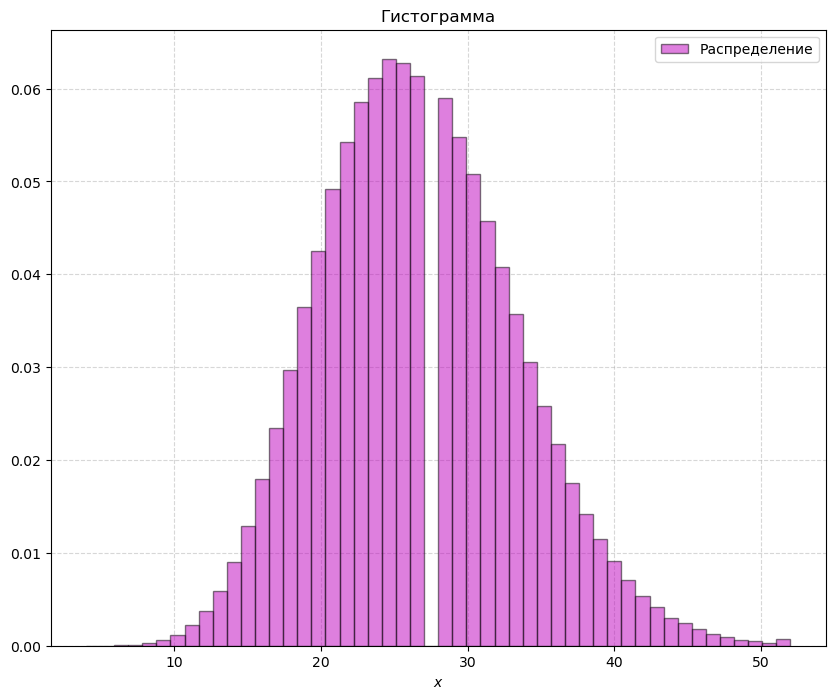

In [11]:
# Создание гистограммы из списка точек
def create_histogram(list_of_points):
    if len(list_of_points) == 0:
        generate_array_of_points() 
        
    list_of_points = np.array(list_of_points, dtype=float)  # Преобразуем в массив
    
    # Построение гистограммы
    plt.figure(figsize=(10, 8))
    plt.hist(list_of_points, bins=50, color='m', density=True, edgecolor='k', label='Распределение', alpha=0.5, zorder=2)
    plt.xlabel(r'$x$')
    plt.legend()
    plt.grid(which='both', linestyle='--', alpha=0.5)
    plt.title("Гистограмма")
    plt.show()
    
# Количество генерируемых значений
values = 10**6
list_with_points_2 = [generate_descreete_value() for _ in range(values)]  # Генерация случайных дискретных значений
create_histogram(list_with_points_2)  # Создание гистограммы для сгенерированных значений


In [12]:
# Вычисление статистик
N = len(list_with_points_2)  # Общее количество сгенерированных точек
mu = (np.array(list_with_points_2)).mean()  # Среднее значение сгенерированных точек
sigma = ((list_with_points_2 - mu) ** 2).sum() / (N - 1)  # Расчет выборочной дисперсии
# Выборочная дисперсия — это мера разброса данных в выборке. Она показывает, насколько значения в выборке отличаются от среднего значения.

# Доверительный интервал для среднего
beta = 0.95  # Уровень доверия
gamma = (1 + beta) / 2  # Корректированный гамма для двухстороннего теста
t_gamma = stats.t.ppf(gamma, N - 1)  # Критическое значение t
# Корректированный t-критерий (гамма) используется в двусторонних тестах, чтобы определить доверительные интервалы.

# Вычисление нижней и верхней границ доверительного интервала
low_mu = mu - sigma / np.sqrt(N) * t_gamma
upper_mu = mu + sigma / np.sqrt(N) * t_gamma

In [13]:
print("Точечная оценка матожидания: ", f"{mu:.4f}")
print("Точечная оценка дисперсии: ", sigma)

print(f"{beta}% интервальная оценка матожидания: [{low_mu:.4f}, {upper_mu:.4f}]")

Точечная оценка матожидания:  26.6619
Точечная оценка дисперсии:  44.33667804018904
0.95% интервальная оценка матожидания: [26.5750, 26.7488]


In [14]:
# Вычисление статистики Колмогорова для проверки соответствия
ecdf = stats.ecdf(list_with_points_2)  # Эмпирическая CDF
kolmogorov_stat = max(abs(ecdf.cdf.evaluate(x) - real_cdf(x)) for x in np.linspace(0, 1, N)) * np.sqrt(N)  # Статистика Колмогорова
print(f"Статистика Колмогорова-Смирнова: {kolmogorov_stat:.4f}")

# Вычисление p-значения для теста Колмогорова-Смирнова
p_value = 1 - stats.kstwobign.cdf(kolmogorov_stat)  # Расчет p-значения
print("p_value: ", p_value)  # Вывод p-значения

Статистика Колмогорова-Смирнова: 0.0000
p_value:  1.0
